In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

-9.761021719902196 1.6145744834544478 -2.5
-2.25
-3.6683109273161314 1.6145744834544478 -0.6139189025614914


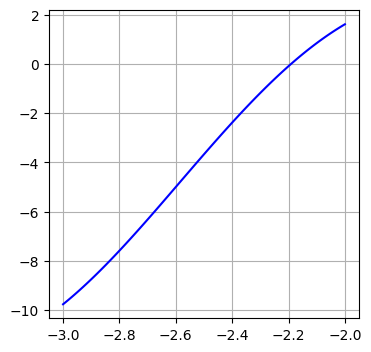

In [ ]:
# Metodo de biseccion
x = np.linspace(-3,-2,100)
def f(x):
  return 2*x*np.cos(2*x)-(x+1)**2
y = f(x)
plt.figure(figsize = [4,4])
plt.plot(x,y,"b")
plt.grid()
a = -3
b = -2
pm1 = (b+a)/2
print(f(a), f(b), pm1)
a = pm1
pm2 = (b+a)/2
print(pm2)
print(f(a),f(b), f(pm2))

In [ ]:
# a, b limites del intervalo (f(a)*f(b)<0)
# tolerancia de la longuitud del intervalo
# numero maximo de interaciones
def met_biseccion(f,a,b,tol,n):
  if f(a)*f(b)>=0:
    ap="Cambie las condiciones o tiene la raiz"
  else:
    l = abs(b - a)
    i = 1
    while (i <= n) and (l >= tol):
      pm=(b+a)/2
      if f(a)*f(pm) < 0:
        b = pm
      elif f(a)*f(pm) == 0:
        ap = pm
        break
      else:
        a = pm
      ap = pm
      l =abs(b-a)
      i += 1
  ap = pm
  return ap, i

met_biseccion(f, -3, -2, 10**(-20), 400)

(-2.191308011797247, 401)

-4.09464795161365


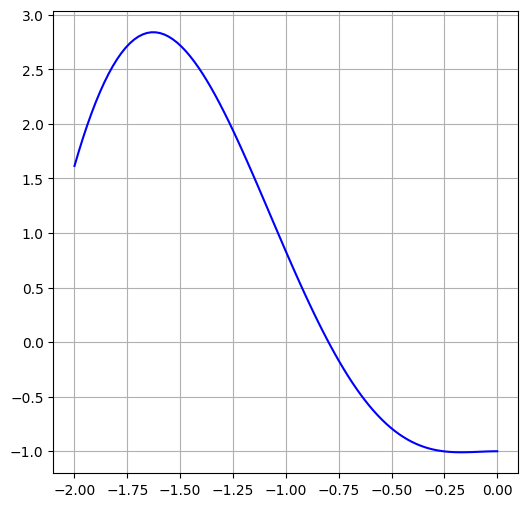

In [ ]:
#14/02/24
#Metodo de Newton Raphson

x = np.linspace(-2,0,100)
def f(x):
  return 2*x*np.cos(2*x)-(x+1)**2

def fp(x):
  return 2*np.cos(2*x)-4*x*np.sin(2*x)-2*(x+1)
y = f(x)


plt.figure(figsize = [6,6])
plt.plot(x,y,"b")
plt.grid()

x0 = -1.25
print(fp(x0))



In [ ]:
def newtonRP(x,f, fp, iter):
  ans = x
  for i in range(iter):
    ans = ans - f(ans)/fp(ans)
  return ans

print(newtonRP(x0,f, fp, 10))

"""
X0 = limites del intervalo f'(X0) <= tol1
tol1 -tolerancia de la derivada diferente de cero
tol2 -tolerancia de los elementos de la sucesion
n-numero maximo de iteraciones
"""

def newtonRP2( f, fp, x0, tol1, tol2, n):
  if abs(fp(x0))<=tol1:
    ap="Cambie las condiciones"
    i = 0
  else:
    x1 = x0 - f(x0)/fp(x0)
    l = abs(x1-x0)
    i = 1
    while (i <= n) and (l >= tol2):
      x0 = x1
      x1 = x0 - f(x0)/fp(x0)
      if abs(fp(x1))<= tol1:
        ap="Cambie las condiciones"
        break
      ap = x1
      l = abs(x1 - x0)
      i = i+1
  return ap, i
print(newtonRP2(f, fp, 0, 10**(-8), 10**(-8), 30))

-0.7981599614057959
('Cambie las condiciones', 0)


-1.9564491424152823
0.765034682391819 -2.3724704923185373
0.7422994068649436 -0.03829308296540812


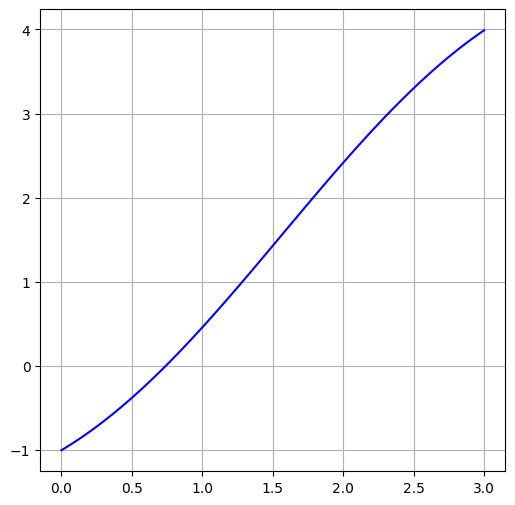

In [ ]:
# 16/02/24

# x = cos(x) -> f(x) = x - cos(x) = 0

# Metodo de la secante

x = np.linspace(0,3,100)
def f(x):
  return x-np.cos(x)

y = f(x)


plt.figure(figsize = [6,6])
plt.plot(x,y,"b")
plt.grid()

x0 = 1
x1 = 2
print(f(x0)-f(x1))
x2 = x1 - (f(x1) * (x1 - x0))/(f(x1) - f(x0))
print(x2, f(x2) - f(x1))
x3 = x2 - (f(x2) * (x2 - x1))/(f(x2) - f(x1))
print(x3, f(x3) - f(x2))

In [ ]:
def met_sec(f,x0,x1,tol1,tol2,n):
  if abs(f(x0)-f(x1))<=tol1:
    ap = "cambie condiciones"
    i = 0
  else:
    l = abs(x1-x0)
    i = 1
    while(i <= n) and (l >= tol2):
      x2 = x1 - (f(x1) * (x1 - x0))/(f(x1) - f(x0))
      if abs(f(x1)-f(x2)) <= tol1:
        ap = "cambie condiciones"
        break
      ap = x2
      l = abs(x1 - x2)
      x0 = x1
      x1 = x2
      i += 1
  return ap, i
print(met_sec(f, 4,5,10**(-15), 10**(-13),30))

(0.7390851332151607, 10)


In [ ]:
# 21/02/24

# Falsa posicion

def met_falsa_posicon(f,x0,x1,tol2,n):
  if f(x0)*f(x1) >= 0:
    ap = "cambie las condiciones o tiene la raiz"
    i = 0
  else:
    l = abs(x1-x0)
    i = 1
    while (i <= n) and (l >= tol2):
      x2 = x1 - (f(x1) * (x1 - x0))/(f(x1) - f(x0))
      if f(x0)*f(x2) < 0:
        x1 = x2
      elif f(x0)*f(x2) > 0:
        x0 = x1
        x1 = x2
      else:
        ap = x2
        break
      ap = x2
      l = abs(x0 - x1)
      i = i+1
  return ap, i
met_falsa_posicon(f, 0, 1, 10**(-5),50)

(0.7390851332151607, 13)

[-0.99506152]


(-0.9950615177038502, 7)

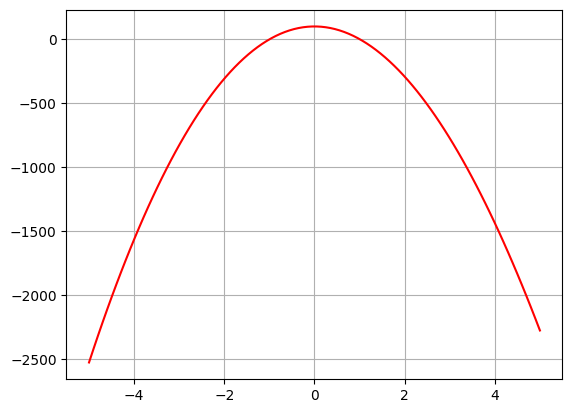

In [ ]:
# Mismas funciones pero con librerias

from scipy.optimize import fsolve

def f(x):
  y = x**3-100*x**2+100
  return(y)
x = np.linspace(-5,5,100)
y = f(x)
plt.figure()
plt.plot(x,y,"r")
plt.grid()
root = fsolve(f, -2)
print(root)
met_falsa_posicon(f, -1, 0, 10**(-5),50)

[0.16616603]
solucion: 0.8338339653416318


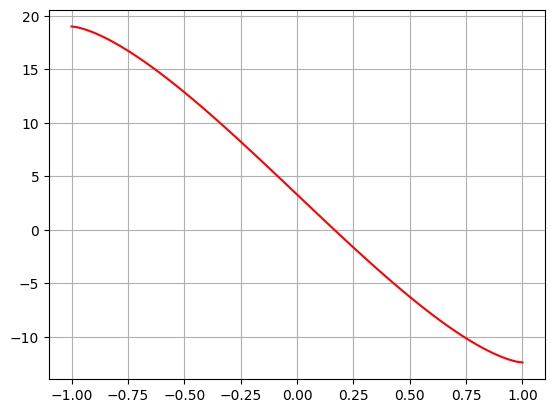

In [ ]:
# Ejercicio de aplicacion

def f(h):
  return 10*(0.5*np.pi - np.arcsin(h)-h*np.sqrt(1-h**2))-12.4

h = np.linspace(-1,1,100)
y = f(h)
plt.figure()
plt.plot(h,y,"r")
plt.grid()
root = fsolve(f, 0.5)
print(root)
met_falsa_posicon(f, -0.25, 0.25, 10**(-5),50)
print("solucion:", 1 - root[0])